In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airbnb_df = pd.read_csv("../data/processed/sf_airbnb_listings_cleaned.csv").drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
damage_df = pd.read_csv("../data/processed/damagedProperty.csv").drop(columns=["Unnamed: 0"])
homeless_df = pd.read_csv("../data/processed/homelessConcerns.csv").drop(columns=["Unnamed: 0"])
noise_df = pd.read_csv("../data/processed/noiseReports.csv").drop(columns=["Unnamed: 0"])

In [3]:
airbnb_df.iloc[0]

summary                      New update: the house next door is under const...
space                        Newly remodeled, modern, and bright garden uni...
description                  New update: the house next door is under const...
house_rules                  * No Pets - even visiting guests for a short t...
host_listings_count                                                          1
host_total_listings_count                                                    1
neighborhood                                                  Western Addition
zipcode                                                                  94117
latitude                                                               37.7693
longitude                                                             -122.434
is_location_exact                                                            t
room_type                                                      Entire home/apt
accommodates                                        

In [4]:
damage_df.iloc[0]

CaseID                                                 11771122
Opened                                      2019-12-04 16:24:00
Closed                                                      NaN
Updated                                     2019-12-04 17:00:02
Status                                                     Open
Status Notes                                           accepted
Responsible Agency                         DPT Meter_Bike Queue
Category                                       Damaged Property
Request Type                              Damaged Parking_Meter
Request Details                                   Parking_Meter
Address                intersection of haight st and ashbury st
Street                                                HAIGHT ST
Supervisor District                                           5
Neighborhood                                     haight ashbury
Police District                                            park
Y                                       

In [5]:
homeless_df.iloc[0]

CaseID                                                    11770932
Opened                                         2019-12-04 15:47:00
Closed                                                         NaN
Updated                                        2019-12-05 03:56:44
Status                                                        Open
Status Notes                                                closed
Responsible Agency                Police - Homeless Concerns Queue
Category                                         Homeless Concerns
Request Type                                   Individual Concerns
Request Details                                     homeless_other
Address                759 clementina st, san francisco, ca, 94103
Street                                               CLEMENTINA ST
Supervisor District                                              6
Neighborhood                                       south of market
Police District                                           sout

In [6]:
noise_df.iloc[0]

CaseID                                                          11739107
Opened                                               2019-11-26 10:58:00
Closed                                               2019-11-26 11:31:00
Updated                                              2019-11-26 11:31:00
Status                                                            Closed
Status Notes           Sent to DPH Consumer Protection Program distri...
Responsible Agency              DPH - Environmental Health - Noise Queue
Category                                                    Noise Report
Request Type                                        mechanical_equipment
Request Details                      Noise Report - mechanical_equipment
Address                           3985 17th st, san francisco, ca, 94114
Street                                                           17TH ST
Supervisor District                                                    8
Neighborhood                                       

In [7]:
airbnb_in_d = airbnb_df["supervisor_district"].value_counts().rename("num_airbnb_in_sd")
damages_in_d = damage_df["Supervisor District"].value_counts().rename("num_property_damages_in_sd")
homeless_in_d = homeless_df["Supervisor District"].value_counts().rename("num_homeless_concerns_in_sd")
noises_in_d = noise_df["Supervisor District"].value_counts().rename("num_noise_complaints_in_sd")

combined_df = airbnb_df.join(damages_in_d, on=["supervisor_district"])
combined_df = combined_df.join(homeless_in_d, on=["supervisor_district"])
combined_df = combined_df.join(noises_in_d, on=["supervisor_district"])

combined_df.head()

,summary,space,description,house_rules,host_listings_count,host_total_listings_count,neighborhood,zipcode,latitude,longitude,...,availability_365,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,reviews_per_month,supervisor_district,num_property_damages_in_sd,num_homeless_concerns_in_sd,num_noise_complaints_in_sd
0,New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,* No Pets - even visiting guests for a short t...,1,1,Western Addition,94117,37.76931,-122.43386,...,92,192,97.0,10.0,9.0,1.60,8.0,6002.0,3562.0,2379.0
1,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,"Please respect the house, the art work, the fu...",2,2,Bernal Heights,94110,37.74511,-122.42102,...,0,111,98.0,10.0,9.0,0.90,9.0,8609.0,4208.0,2762.0
2,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"No party, No smoking, not for any kinds of smo...",10,10,Haight Ashbury,94117,37.76669,-122.45250,...,365,17,85.0,9.0,8.0,0.14,5.0,11489.0,2490.0,2572.0
3,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,no pet no smoke no party inside the building,10,10,Haight Ashbury,94117,37.76487,-122.45183,...,346,8,93.0,9.0,9.0,0.14,5.0,11489.0,2490.0,2572.0
4,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,House Manual and House Rules will be provided ...,2,2,Western Addition,94117,37.77525,-122.43637,...,90,27,97.0,10.0,9.0,0.23,5.0,11489.0,2490.0,2572.0


In [8]:
sup_dis = pd.DataFrame(pd.Series(list(range(1, 12)), index=list(range(1,12)), name="supervisor_district"))
# pd.concat([sup_dis, airbnb_in_d, damages_in_d], axis=1)
airbnb_in_d_df = pd.DataFrame(airbnb_in_d.rename("value"))
airbnb_in_d_df["feature"] = "Airbnb Listings"
damages_in_d_df = pd.DataFrame(damages_in_d.rename("value"))
damages_in_d_df["feature"] = "Property Damages"
homeless_in_d_df = pd.DataFrame(homeless_in_d.rename("value"))
homeless_in_d_df["feature"] = "Homeless Concerns"
noises_in_d_df = pd.DataFrame(noises_in_d.rename("value"))
noises_in_d_df["feature"] = "Noise Complaints"

airbnb_in_d_df = pd.merge(sup_dis, airbnb_in_d_df, left_index=True, right_index=True)
damages_in_d_df = pd.merge(sup_dis, damages_in_d_df, left_index=True, right_index=True)
homeless_in_d_df = pd.merge(sup_dis, homeless_in_d_df, left_index=True, right_index=True)
noises_in_d_df = pd.merge(sup_dis, noises_in_d_df, left_index=True, right_index=True)

combined_nums_df = pd.concat([airbnb_in_d_df, damages_in_d_df, homeless_in_d_df, noises_in_d_df], axis=0).reset_index()

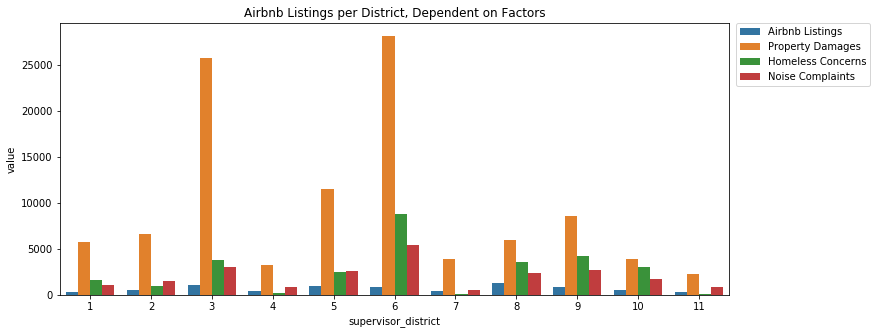

In [9]:
plt.figure(figsize=(12, 5))
plot = sns.barplot(x="supervisor_district", y="value", hue="feature", data=combined_nums_df)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title("Airbnb Listings per District, Dependent on Factors")
fig = plot.get_figure()
fig.savefig( 'airbnb_combined_sd.png', dpi=300, transparent=False, format="png", bbox_inches="tight")

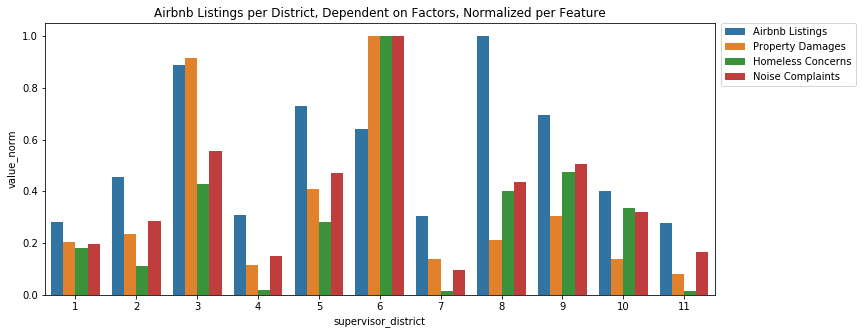

In [10]:
def normalize_value(x):
    min_max = (x["value"].min(), x["value"].max())
    x["value_norm"] = x["value"].apply(lambda x: x / min_max[1])
    return x

combined_nums_df = combined_nums_df.groupby("feature").apply(normalize_value).reset_index().drop(columns=["index"])

plt.figure(figsize=(12, 5))
plot = sns.barplot(x="supervisor_district", y="value_norm", hue="feature", data=combined_nums_df)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title("Airbnb Listings per District, Dependent on Factors, Normalized per Feature")
fig = plot.get_figure()
fig.savefig( 'airbnb_combined_norm_sd.png', dpi=300, transparent=False, format="png", bbox_inches="tight")